Determining motion vector for 2 consective frames of type of a video.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
globe_video=cv2.VideoCapture("globe.mp4")

In [3]:
frames = []
while globe_video.isOpened():
  st, image = globe_video.read()
  if st == False:
    break

  else:
    frames.append(image)

In [4]:
frames=np.array(frames)
frames.shape

(901, 270, 480, 3)

In [5]:
frames=frames[:,:,:,0]

In [6]:
frames.shape

(901, 270, 480)

In [7]:
def matchblock(ref_frame, block):
  rows, cols = ref_frame.shape
  r_c = []
  min_sq = []

  for i in range(rows//8):
    for j in range(cols//8):
      ref_block = ref_frame[i*8:(i+1)*8, j*8:(j+1)*8]
      error = np.square(ref_block - block).mean()
      min_sq.append(error)
      r_c.append([i*8, j*8])

  min_sq = np.array(min_sq)
  r_c = np.array(r_c)
  min_error = min_sq.min()
  matched_block = np.where(min_sq == min_error)
  matched_coordinates = r_c[matched_block]
  return min_error,matched_coordinates

Text(0.5, 1.0, 'Current Frame')

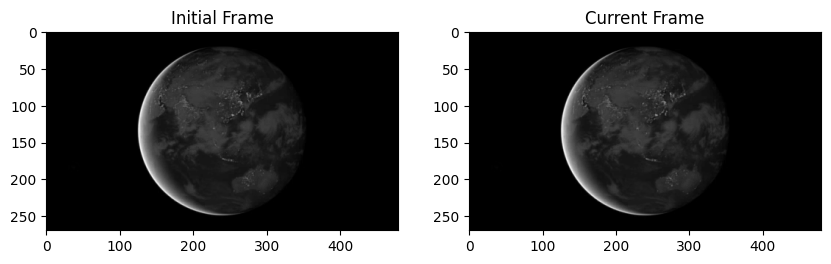

In [8]:
r_frame = frames[0]
c_frame = frames[1]
plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(r_frame,cmap="gray")
plt.title("Initial Frame")

plt.subplot(122)
plt.imshow(c_frame,cmap="gray")
plt.title("Current Frame")

In [9]:
r_curr, c_curr = 100, 150
c_block = c_frame[r_curr: r_curr+8, c_curr: c_curr+8]

min_error,matched_coordinates = matchblock(c_frame,c_block)

In [10]:
min_error

33.234375

In [11]:
x=matched_coordinates[0,0]
y=matched_coordinates[0,1]

In [12]:
x,y

(80, 200)

In [13]:
mv=(x-r_curr,y-c_curr)
mv

(-20, 50)

For the given video, 0th frame is considered as reference frame and 1st frame is considered as current frame.   
Here, 8*8 subblock is extracted from current frame and is matched with block in reference frame.  
If top-left corner of current block is (100,150), the top-left corner of match block is (80,200).  
Hence, motion vector for current block is (-20, 50)